In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iamprateek/store-transaction-data

  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 127MB/s]


In [4]:
!unzip "/content/store-transaction-data.zip"

Archive:  /content/store-transaction-data.zip
  inflating: Hackathon_Ideal_Data.csv  
  inflating: Hackathon_Mapping_File.csv  
  inflating: Hackathon_Validation_Data.csv  
  inflating: Hackathon_Working_Data.csv  
  inflating: Sample Submission.csv   


In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/Hackathon_Ideal_Data.csv'
df = pd.read_csv(file_path)

# Filter rows where either 'VALUE' or 'QTY' is not equal to 0
df = df[(df['VALUE'] != 5) & (df['QTY'] != 0)]

# Display the first 10 rows of the modified dataset
print(df.head(10))


   MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0     M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1     M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2     M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3     M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
5     M1        P2    1     90  HAIR CONDITIONERS  HAIR CONDITIONERS   
7     M1        P2   10     34  HAIR CONDITIONERS  HAIR CONDITIONERS   
8     M1        P2   11     37  HAIR CONDITIONERS  HAIR CONDITIONERS   
9     M1        P2    2      7  HAIR CONDITIONERS  HAIR CONDITIONERS   
12    M1        P2    4     12  HAIR CONDITIONERS  HAIR CONDITIONERS   
14    M1        P3   29    116  HAIR CONDITIONERS  HAIR CONDITIONERS   

                SSGRP                         CMP     MBRD  \
0   HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED     DOVE   
1   HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED     DOVE   
2   HAIR CONDITIONERS

Data Exploration

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



# Explore the distribution of transactions across different months

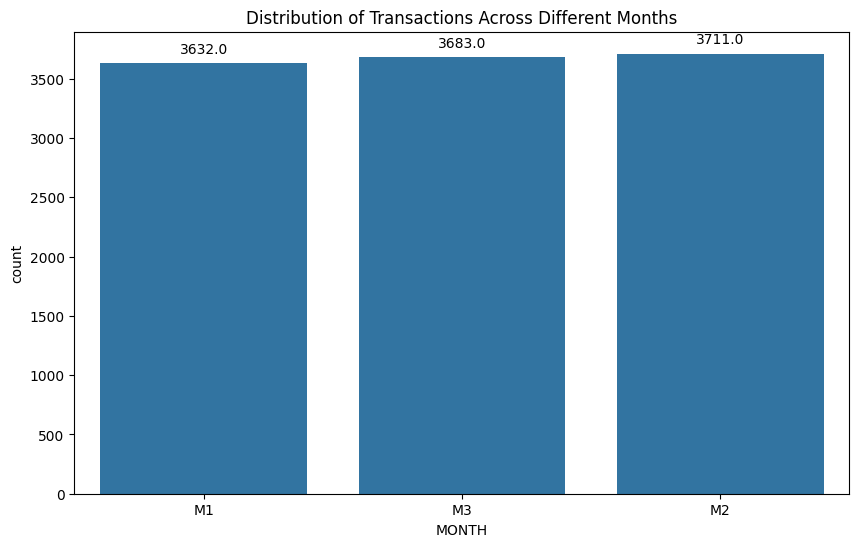

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MONTH', data=df)
plt.title('Distribution of Transactions Across Different Months')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Analyze the distribution of transactions across different stores

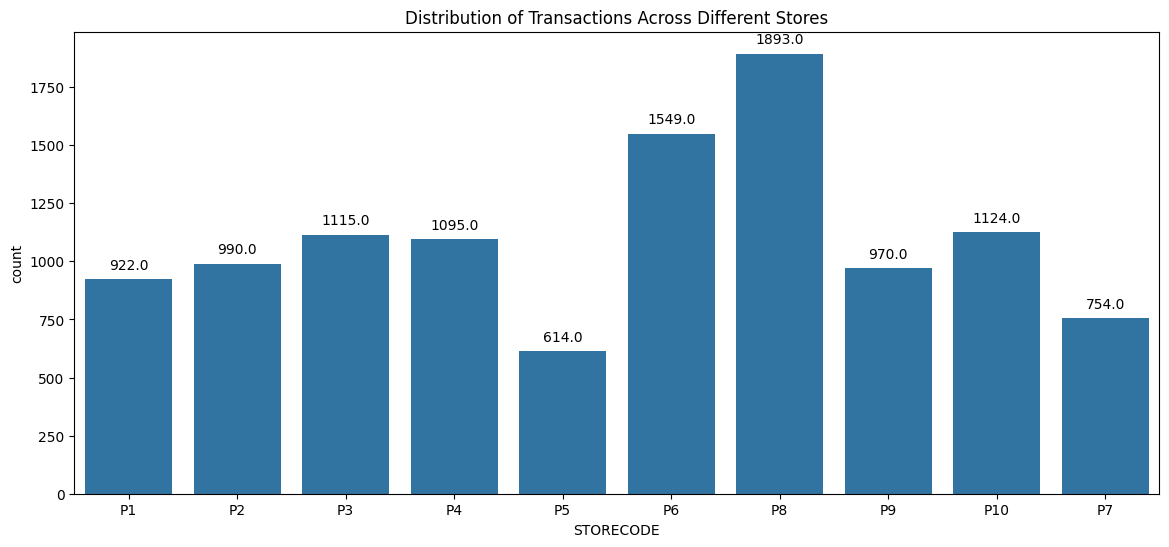

In [8]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='STORECODE', data=df)
plt.title('Distribution of Transactions Across Different Stores')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Examine the distribution of quantities (QTY) and values (VALUE)

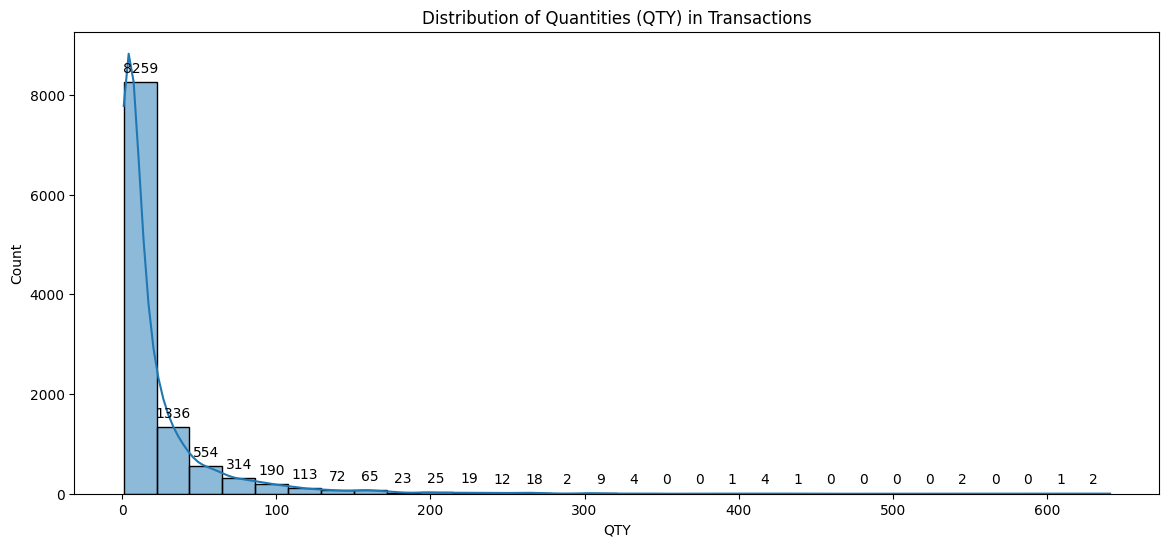

In [9]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(df['QTY'], bins=30, kde=True)
plt.title('Distribution of Quantities (QTY) in Transactions')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

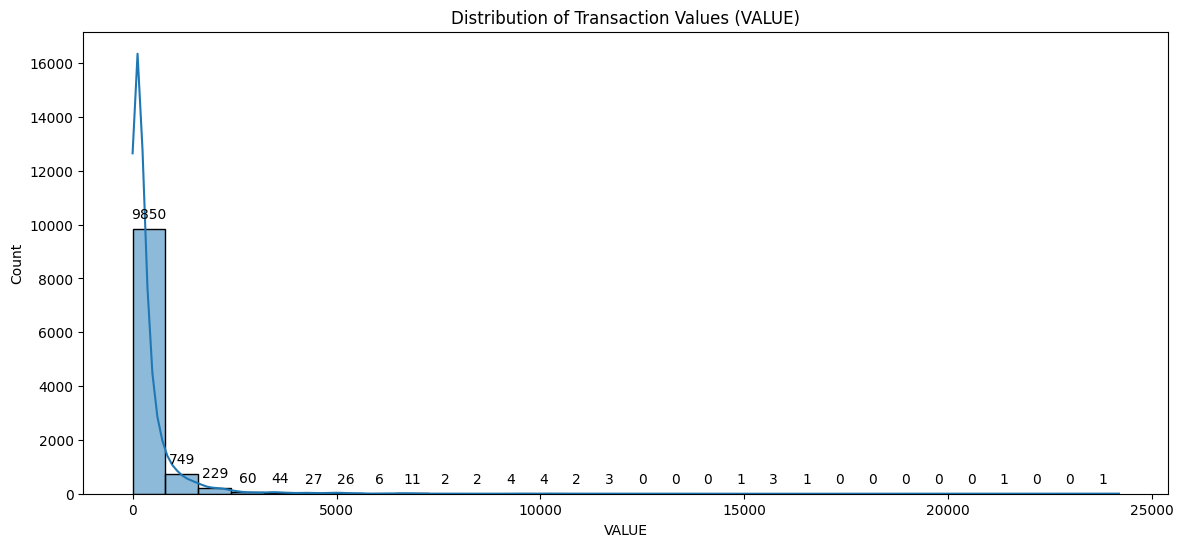

In [10]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(df['VALUE'], bins=30, kde=True)
plt.title('Distribution of Transaction Values (VALUE)')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Explore purchasing patterns over time

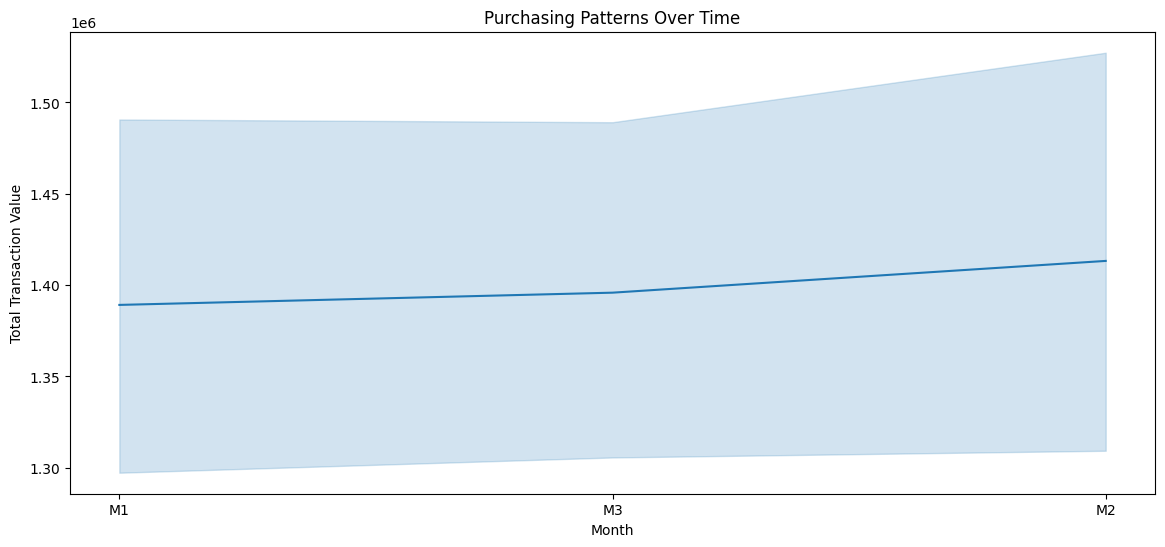

In [11]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(x='MONTH', y='VALUE', data=df, estimator=sum)
plt.title('Purchasing Patterns Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()

# **Customer Behaviour**

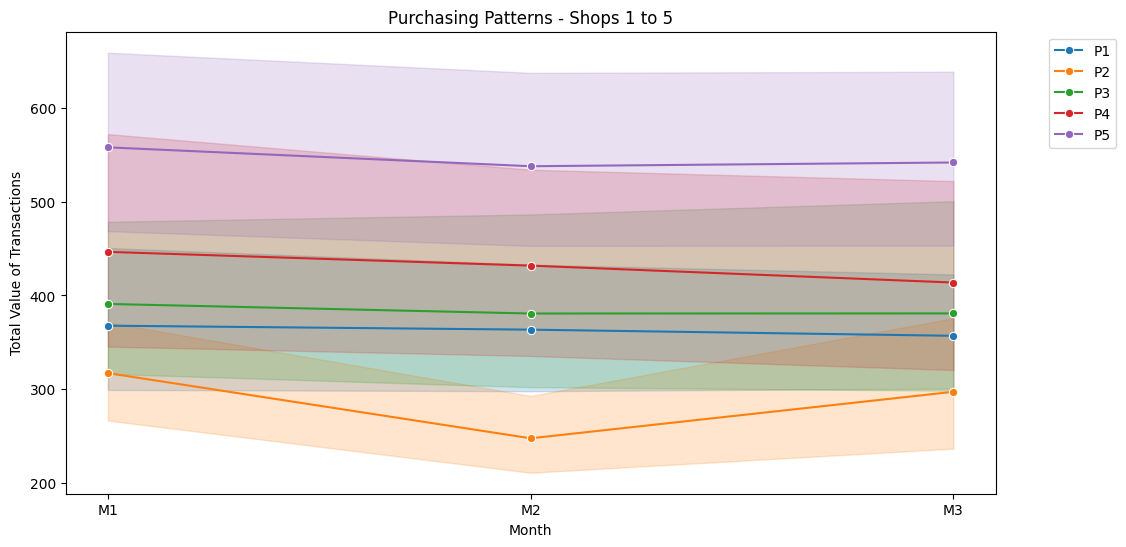

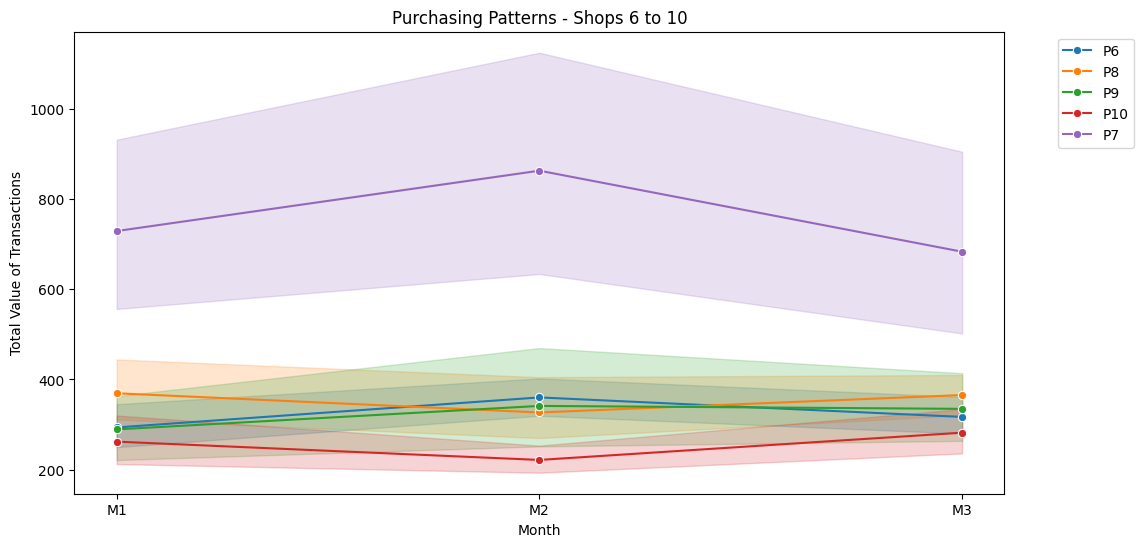

In [12]:
# Convert 'MONTH' to a categorical variable for proper ordering
months_order = ['M1', 'M2', 'M3']  # Adjust the order as needed
df['MONTH'] = pd.Categorical(df['MONTH'], categories=months_order, ordered=True)

# Assuming 'STORECODE' is in the format 'P1', 'P2', ..., 'P10', 'P11', ...
# Extract the numeric part of 'STORECODE'
df['STORECODE_NUMBER'] = df['STORECODE'].str.extract('(\d+)').astype(int)

# Separate the data into two sets: (1,2,3,4,5) and (6,7,8,9,10)
set1 = df[df['STORECODE_NUMBER'].between(1, 5)]
set2 = df[df['STORECODE_NUMBER'].between(6, 10)]

# Plotting purchasing patterns over time for set1
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='VALUE', data=set1, hue='STORECODE', marker='o')
plt.title('Purchasing Patterns - Shops 1 to 5')
plt.xlabel('Month')
plt.ylabel('Total Value of Transactions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting purchasing patterns over time for set2
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='VALUE', data=set2, hue='STORECODE', marker='o')
plt.title('Purchasing Patterns - Shops 6 to 10')
plt.xlabel('Month')
plt.ylabel('Total Value of Transactions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Count the occurrences of each product group (GRP)

<ipython-input-13-631bbaf304fc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')  # Rotate x-axis labels for better visibility


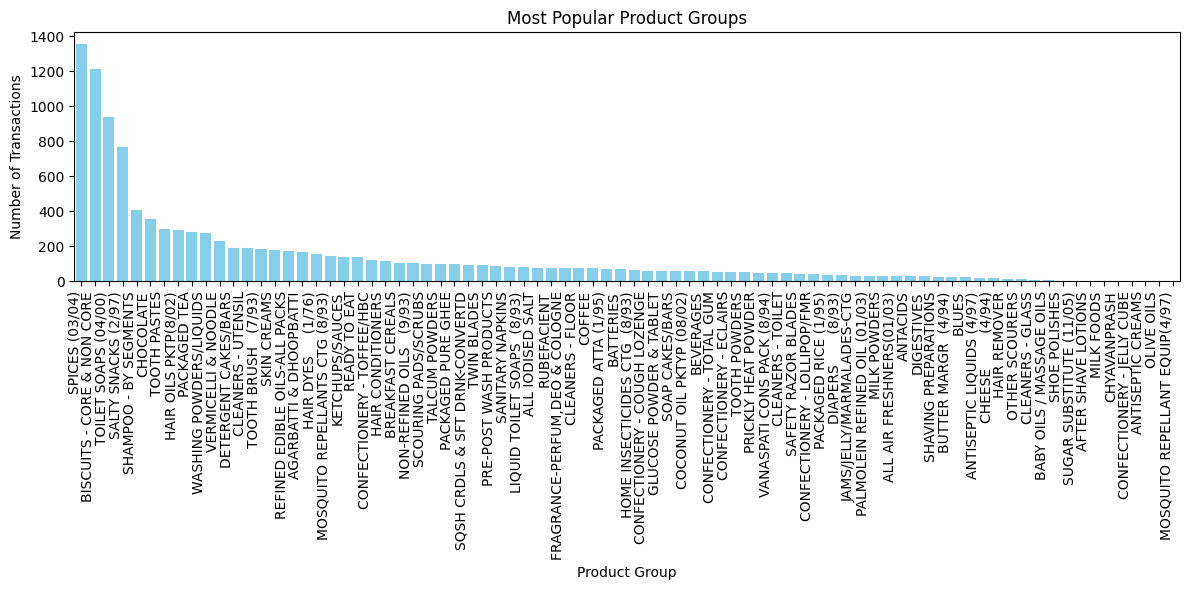

SPICES (03/04)                    1355
BISCUITS - CORE & NON CORE        1215
TOILET SOAPS (04/00)               940
SALTY SNACKS (2/97)                770
SHAMPOO - BY SEGMENTS              407
                                  ... 
CHYAVANPRASH                         3
CONFECTIONERY - JELLY CUBE           2
ANTISEPTIC CREAMS                    2
OLIVE OILS                           1
MOSQUITO REPELLANT EQUIP(4/97)       1
Name: GRP, Length: 80, dtype: int64


In [13]:
# Count the occurrences of each product group (GRP)
grp_counts = df['GRP'].value_counts()

# Save the counts to a CSV file
grp_counts.to_frame(name='Number of Transactions').reset_index().rename(columns={'index': 'Product Group'}).to_csv('product_group_counts.csv', index=False)

# Plotting the most popular product groups with extra space between bars
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=grp_counts.index, y=grp_counts.values, color='skyblue', saturation=3)  # Adjust saturation for extra space
ax.set_title('Most Popular Product Groups')
ax.set_xlabel('Product Group')
ax.set_ylabel('Number of Transactions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Display the product group counts
print(grp_counts)

# Distribution of Transactions across Brands (MBRD)

In [14]:
brand_qty_value = df.groupby('MBRD').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Performance of Specific Brand Variants (BRD)

In [15]:
brand_variant_qty_value = df.groupby('BRD').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

In [16]:
# Sort brand_variant_qty_value DataFrame by descending order of 'QTY'
brand_variant_qty_value_sorted_qty = brand_variant_qty_value.sort_values('QTY', ascending=False)

# Save the sorted DataFrame to CSV
brand_variant_qty_value_sorted_qty.to_csv('total_quantity_by_brand_variant_sorted_qty.csv', index=False)

# Display the first 10 rows of the sorted dataset
print(brand_variant_qty_value_sorted_qty.head(10))


               BRD    QTY   VALUE
367        EVEREST  10888  151185
1031       PARLE-G   4949   30441
214    CLINIC PLUS   4754    9126
1277       SUNSILK   4119    7243
1419   WHEEL GREEN   4061   61384
1145  RIN ADVANCED   3946   37405
1218  SOCIETY LEAF   3729   78664
151    BRU INSTANT   3689    7151
13           AACHI   3434   35250
292     DAIRY MILK   3378   36030


# Top 5 Brand

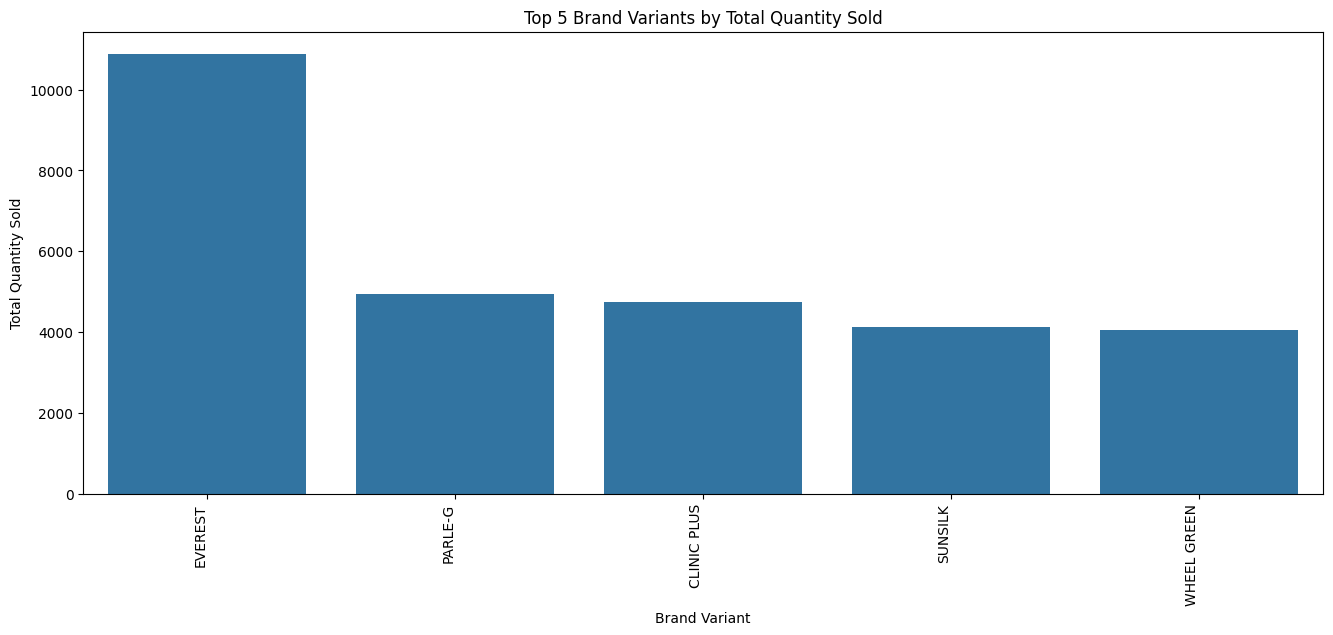

In [17]:

top5_qty = brand_variant_qty_value.sort_values('QTY', ascending=False).head(5)

plt.figure(figsize=(16, 6))
sns.barplot(x='BRD', y='QTY', data=top5_qty, order=top5_qty['BRD'])
plt.title('Top 5 Brand Variants by Total Quantity Sold')
plt.xlabel('Brand Variant')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90, ha='right')
plt.show()

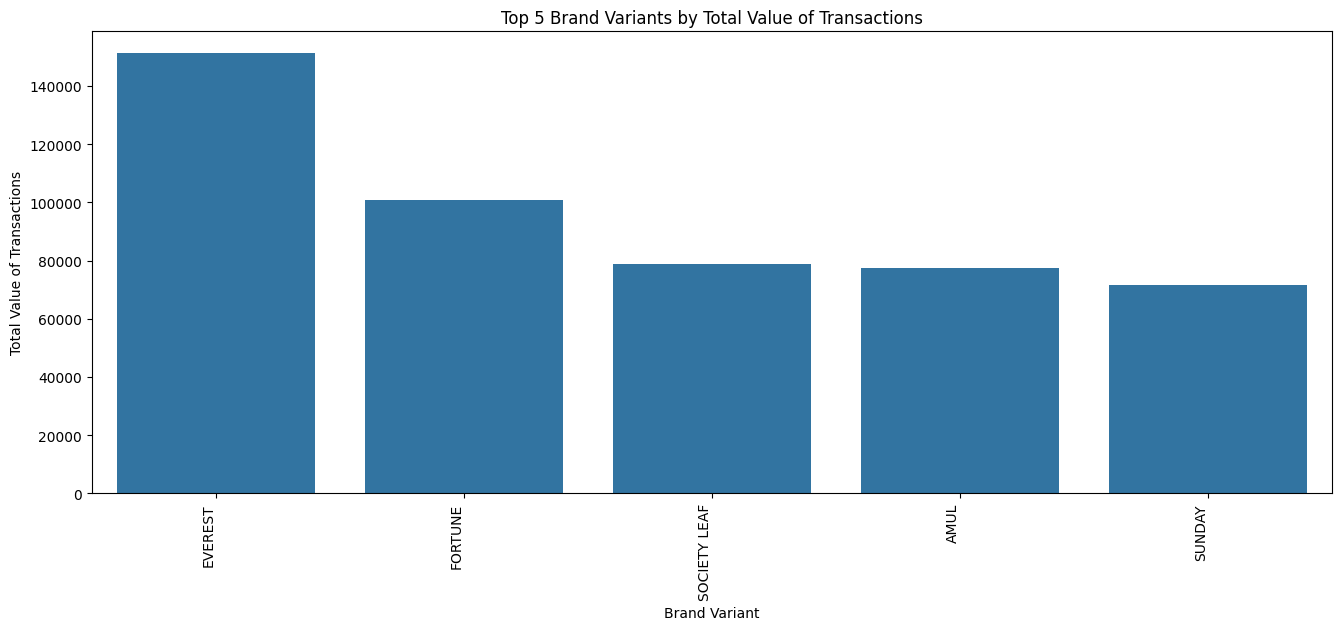

In [18]:
top5_value = brand_variant_qty_value.sort_values('VALUE', ascending=False).head(5)

plt.figure(figsize=(16, 6))
sns.barplot(x='BRD', y='VALUE', data=top5_value, order=top5_value['BRD'])
plt.title('Top 5 Brand Variants by Total Value of Transactions')
plt.xlabel('Brand Variant')
plt.ylabel('Total Value of Transactions')
plt.xticks(rotation=90, ha='right')
plt.show()

# Explore Company Distribution

<ipython-input-19-ce8499181497>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_company_counts.index, y=filtered_company_counts.values, palette='viridis')


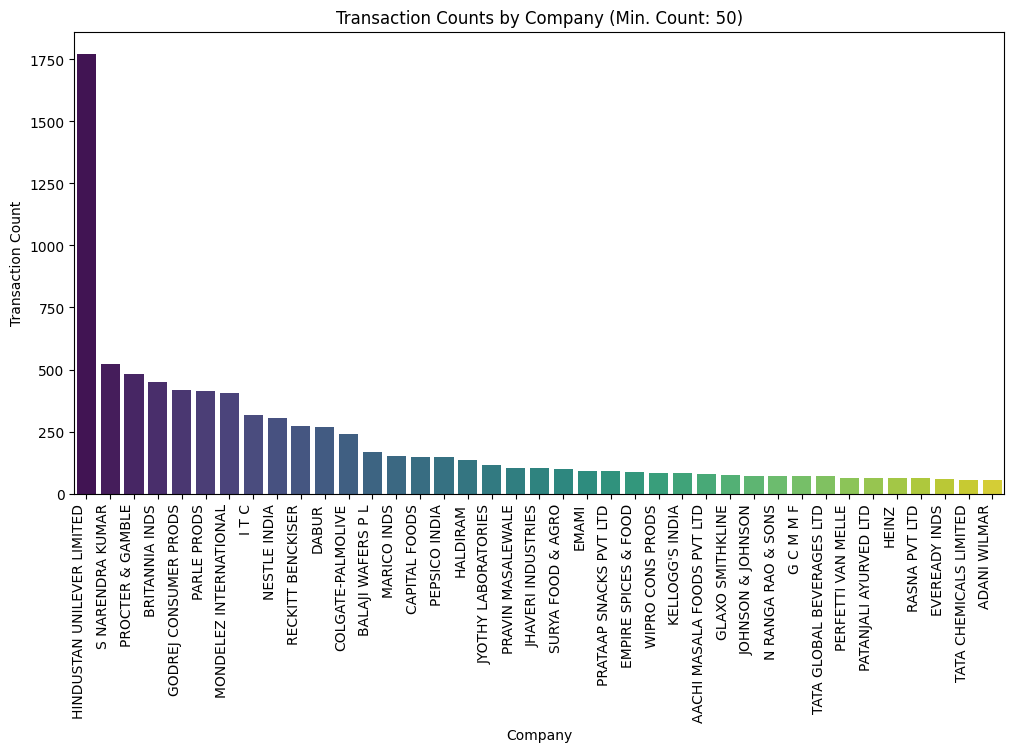

Top Dominant Companies:
HINDUSTAN UNILEVER LIMITED    1773
S NARENDRA KUMAR               521
PROCTER & GAMBLE               481
BRITANNIA INDS                 449
GODREJ CONSUMER PRODS          416
Name: CMP, dtype: int64


In [19]:

company_counts = df['CMP'].value_counts()

# Filter companies with a transaction count below a threshold (e.g., 10)
threshold = 50
filtered_company_counts = company_counts[company_counts >= threshold]

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_company_counts.index, y=filtered_company_counts.values, palette='viridis')
plt.title('Transaction Counts by Company (Min. Count: 50)')
plt.xlabel('Company')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90, ha='right')
plt.show()

# Identify Dominant Companies
dominant_companies = filtered_company_counts.nlargest(5)  # Assuming you want to see the top 5 companies
print("Top Dominant Companies:")
print(dominant_companies)

In [20]:
# Identify Dominant Companies
dominant_companies = company_counts.nlargest(1000)

# Save the sorted DataFrame to CSV
dominant_companies.to_csv('Company_Values.csv', index=False)

# Display the first 10 rows of the sorted dataset
print(dominant_companies.head(10))


HINDUSTAN UNILEVER LIMITED    1773
S NARENDRA KUMAR               521
PROCTER & GAMBLE               481
BRITANNIA INDS                 449
GODREJ CONSUMER PRODS          416
PARLE PRODS                    415
MONDELEZ INTERNATIONAL         405
I T C                          315
NESTLE INDIA                   305
RECKITT BENCKISER              272
Name: CMP, dtype: int64
